In [1]:
import ai.data_set as ds
from ai.neural_network import format_data_set, get_inputs_real_outputs
from ai.evaluation import errors, histogram_percentage

%matplotlib notebook
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import random

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
seed = 42

radius_subgrids = 2
num_rows_grid = 10
num_columns_grid = 10
num_bombs_grid = 10
data_set_size = 500
num_masked_subgrids = 20

ds_file_name = "data_sets/" + ds.data_set_file_name(num_rows_grid, num_columns_grid, num_bombs_grid,
	radius_subgrids, data_set_size, False)
ds_bm_file_name = "data_sets/" + ds.data_set_file_name(num_rows_grid, num_columns_grid, num_bombs_grid,
	radius_subgrids, data_set_size, True)
# 'bm' for means that the tile in the middle of the subgrids contains a bomb.
model_file_name = "model.h5"

random.seed(seed)

# Load the data set.
data_set = list(ds.read_data_set(ds_file_name))
data_set.extend(list(ds.read_data_set(ds_bm_file_name)))
print("Data set loaded.")

# Format the data set.
data_set = format_data_set(data_set, num_masked_subgrids)
print("Data set formatted.")

# Get the 'x' and 'y_true' vectors.
x, y_true = get_inputs_real_outputs(data_set)
print("Inputs and real outputs extracted.")

# Load the model.
model = load_model(model_file_name)

# Prediction and errors.
y_pred = model.predict(x)
y_pred = [y_p[0] for y_p in y_pred]

error_func = lambda y_t, y_p: abs(y_t - y_p)
err = errors(y_true, y_pred, error_func)
print("Errors computed.")

Data set loaded.
Data set formatted.
Inputs and real outputs extracted.
Errors computed.


In [3]:
opacity = 1
color = '#FED487'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'

<IPython.core.display.Javascript object>


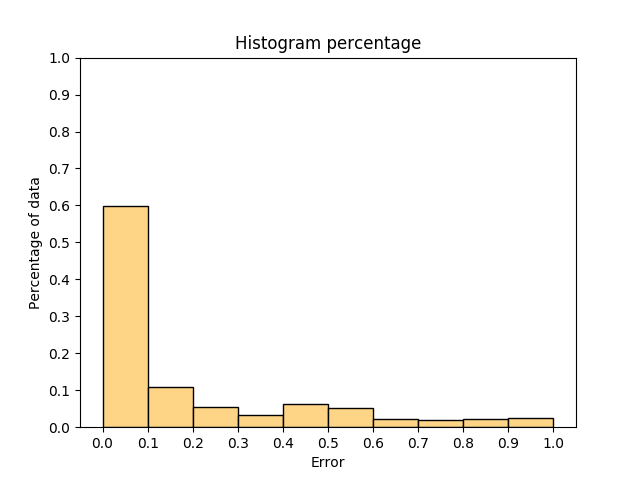

In [7]:
# Histogram percentage

perc_counts, bins = histogram_percentage(err, 10, (0.0, 1.0))

width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
fig = plt.figure()
plt.bar(center, perc_counts, align='center', width=width, color=color, edgecolor=edge_color, alpha=opacity)
#plt.xticks(np.arange(0.0, 1.1, 0.1))
#plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Histogram percentage')
plt.xlabel('Error')
plt.ylabel('Percentage of data')
plt.show()
plt.savefig('histogram_percentage.png', format='png', dpi=100)